In [21]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import functools
from collections import Counter
import math
import statistics

import seaborn as sns
import matplotlib.lines as mlines
import os
from IPython.display import display
import scipy.stats as st

import matplotlib.image as mpimg

In [22]:
df_all_rk = pd.read_csv('./study_data/score/城市信息+排名得分综合表.csv')
df_all_rk.columns

Index(['citycode', 'adcode', 'name', 'level', 'center', 'pro_name',
       'pro_adcode', 'gzh', 'city_shortname', 'pro_shortname', 'en_name',
       'in_citation', 'citation_score', 'pagerank_value', 'pagerank_rank',
       'importance_score', 'pagerank_score', 'Longitude', 'Latitude', 'ARI',
       'GEO', 'HAR'],
      dtype='object')

# build nodes

In [23]:
# 节点构建
df_node_temp = df_all_rk[['name', 'en_name', 'in_citation' ,'level', 'center', 'pro_name', 'gzh', 
                          'pro_shortname', 'ARI', 'GEO', 'HAR',
                         'Longitude', 'Latitude']]
df_node_temp = df_node_temp.sort_values(by=['ARI'], ascending=False)
df_node_temp = df_node_temp.reset_index(drop=True)
df_node_temp['Id'] = df_node_temp.index
# 标记 top 50城市的label
top_50_city_name = list(df_node_temp[0:50]['en_name'].values) + ['' for i in range(len(df_node_temp) - 50)]
df_node_temp['Label'] = top_50_city_name
df_node_temp.to_csv('./study_data/gephi/nodes.csv', index=None)
print('====done===')

====done===


# build edges

In [24]:
df_mx = pd.read_csv('./study_data/cities_gzh_aja_martix.csv', index_col='city')
edges_data = []
for i, row in df_node_temp.iterrows():
    # 起点城市
    source_Id = row['Id']
    source_label = row['name']
    
    # 目标城市
    targets_value = list(df_mx.loc[source_label])
    targets_name = list(df_mx.loc[[source_label]])
    
    for j in range(len(targets_value)):
        # 权重大于0才有边
        if targets_value[j] > 0:
            _val = targets_value[j]
            target_lable = targets_name[j]
            target_Id = list(df_node_temp[df_node_temp.name == target_lable]['Id'])[0]
            edges_data.append([source_Id, target_Id, source_label, target_lable, _val])

df_edges = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Source_Label', 'Target_Label', 'Weight'])
df_edges.to_csv('./study_data/gephi/edges.csv', index=None)
df_edges

,Source,Target,Source_Label,Target_Label,Weight
0,0,213,北京市,齐齐哈尔市,2
1,0,38,北京市,黄山市,5
2,0,5,北京市,香港特别行政区,34
3,0,19,北京市,青岛市,7
4,0,143,北京市,雅安市,1
...,...,...,...,...,...
44886,339,158,山南市,临夏回族自治州,1
44887,339,26,山南市,中山市,2
44888,339,1,山南市,上海市,47
44889,339,70,山南市,三亚市,1


In [25]:
len(edges_data)

44891

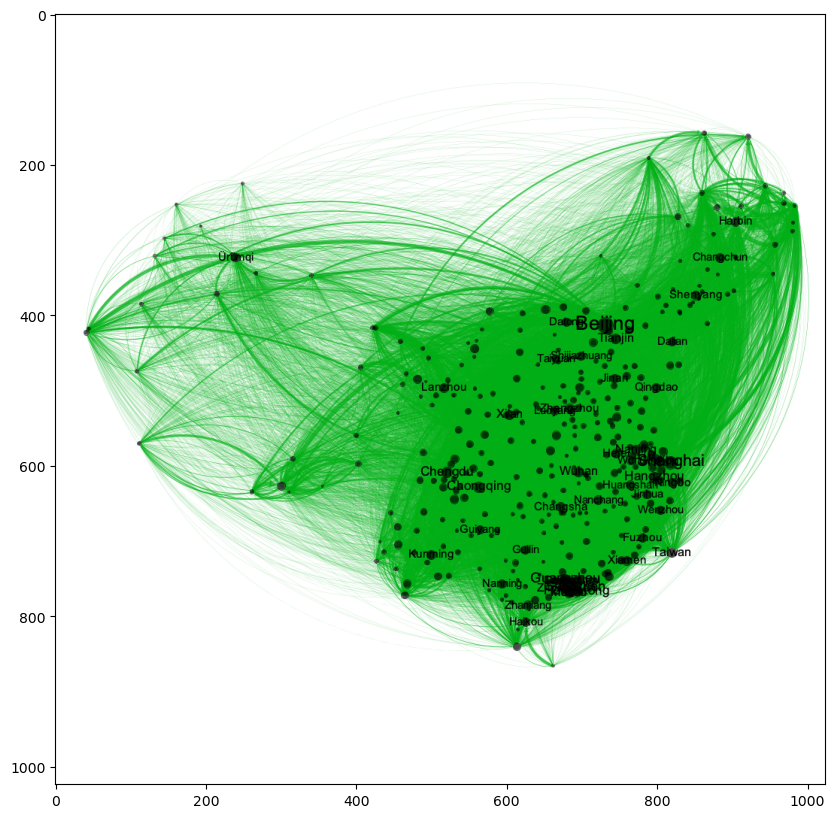

In [27]:
graph_img = mpimg.imread('./study_data/gephi/whole.png')
fig = plt.figure(figsize=(10, 10))
plt.imshow(graph_img)
plt.show()